In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


## Comparison of both the crowded and 1:1 clusters of the various datasets. In particular, focusing on the set-subset differences

---

In [2]:
#some basic inputs
datasets = [
            '60h', 
            'highkick',
            '9day',
            'endgame',
            ]
outpaths = ['./images/'+x+"/" for x in datasets]

print("Datasets", datasets)

Datasets ['60h', 'highkick', '9day', 'endgame']


---

### First lets take a look at the slopes of E_{west} vs E_{east} by calorimeter

In [3]:
slopesByCalo = []
for x in outpaths:
    with open(x+"onetoone/slopes_by_calo.txt") as file:
        line = file.readlines()
        #print(line[0])
        ding = stringToListOfFloats(line[0])
        slopesByCalo.append(ding)

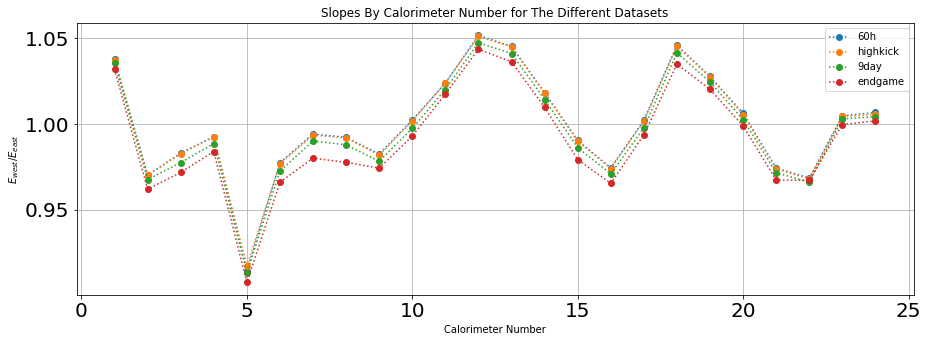

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
for i, x in enumerate(slopesByCalo):
    plt.plot([calo for calo in range(1,25)], x, "o:", label=datasets[i])
plt.grid()
plt.title("Slopes By Calorimeter Number for The Different Datasets")
plt.ylabel(r"$E_{west} / E_{east}$")
plt.xlabel("Calorimeter Number")
plt.legend()
plt.show()

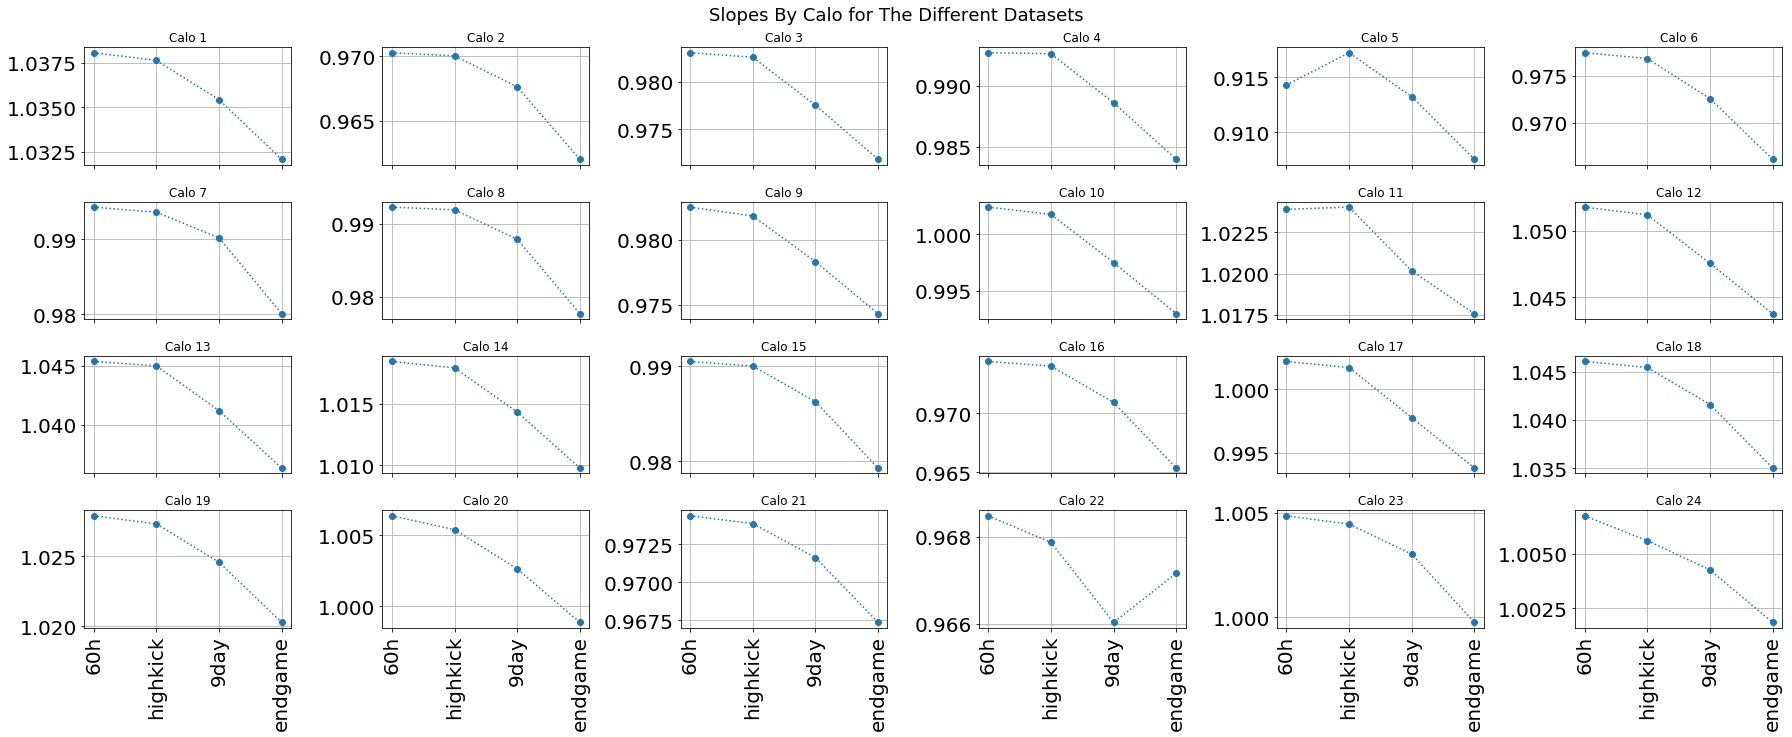

In [5]:
fig, axs = plt.subplots(4,6,figsize=(25,10),sharex=True, sharey=False)
ax = flatten2dArray(axs)

for i, x in enumerate(zip(*slopesByCalo)):
    #print(x)
    ax[i].plot(x, "o:", label="Calo "+str(i+1))
    ax[i].set_title("Calo "+str(i+1))
    ax[i].grid()
    ax[i].set_xticks([0,1,2,3])
    ax[i].set_xticklabels(datasets,rotation=90)

plt.suptitle("Slopes By Calo for The Different Datasets",y=1.02,fontsize=18)
#plt.ylabel(r"$E_{west} / E_{east}$")
#plt.xlabel("Calorimeter Number")
#plt.legend()
plt.tight_layout()
plt.show()

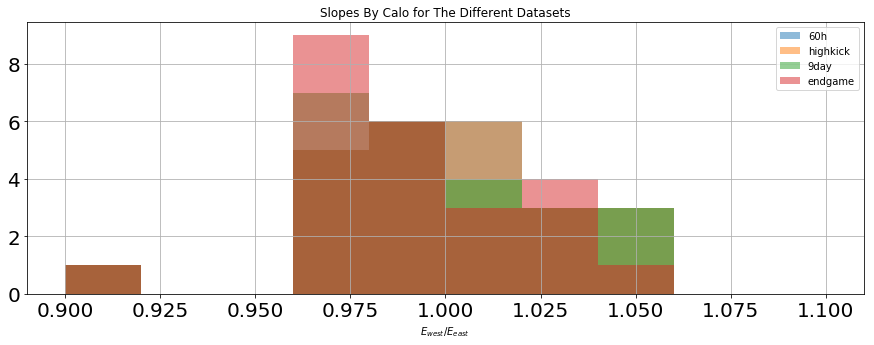

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
for i, x in enumerate(slopesByCalo):
    plt.hist(x, bins=10,range=(0.9,1.1), label=datasets[i],alpha=0.5)
plt.grid()
plt.title("Slopes By Calo for The Different Datasets")
plt.xlabel(r"$E_{west} / E_{east}$")
plt.legend()
plt.show()

---

### And now the slopes for all calorimeters, derived from the gaussian fit at various points

In [7]:
slopesAllCalosByEnergy = []
xValsAllCalosByEnergy = []
for x in outpaths:
    with open(x+"onetoone/slopes_allCalo_fromGaussian.txt") as file:
        line = file.readlines()
        #print(line[0])
        ding = stringToListOfFloats(line[0][:-1])
        slopesAllCalosByEnergy.append(ding)
        dong = stringToListOfFloats(line[1])
        xValsAllCalosByEnergy.append(dong)

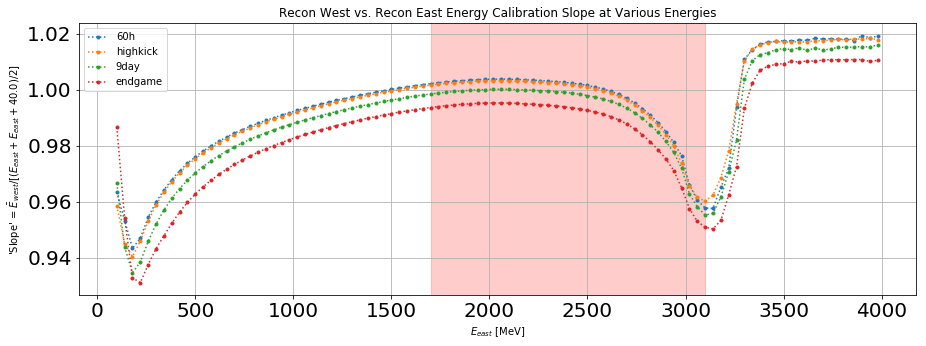

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
for i in range(len(slopesAllCalosByEnergy)):
    plt.plot(xValsAllCalosByEnergy[i], slopesAllCalosByEnergy[i],".:", label=datasets[i])
plt.legend()
plt.grid()
stepsize = xValsAllCalosByEnergy[0][1] - xValsAllCalosByEnergy[0][0]
plt.title("Recon West vs. Recon East Energy Calibration Slope at Various Energies")
plt.xlabel(r"$E_{east}$ [MeV]")
plt.ylabel(r"'Slope' = $\bar{E}_{west} / [(E_{east} + E_{east}+"+str(stepsize)+")/2]$")

rect = matplotlib.patches.Rectangle((1700,0.9), 3100-1700, 10,color="red",alpha=0.2)
ax.add_patch(rect)


plt.show()

---

### The same plot, but for each calo individually

In [9]:
xValsByEnergyByCalo = []
slopesByEnergyByCalo = []
for calo in range(1,25):
    slopesByEnergy = []
    xValsByEnergy = []
    for x in outpaths:
        with open(x+"onetoone/slopes_allCalo_fromGaussian_"+str(calo)+".txt") as file:
            line = file.readlines()
            #print(line[0])
            ding = stringToListOfFloats(line[0][:-1])
            slopesByEnergy.append(ding)
            dong = stringToListOfFloats(line[1])
            xValsByEnergy.append(dong)
    slopesByEnergyByCalo.append(slopesByEnergy)
    xValsByEnergyByCalo.append(xValsByEnergy)

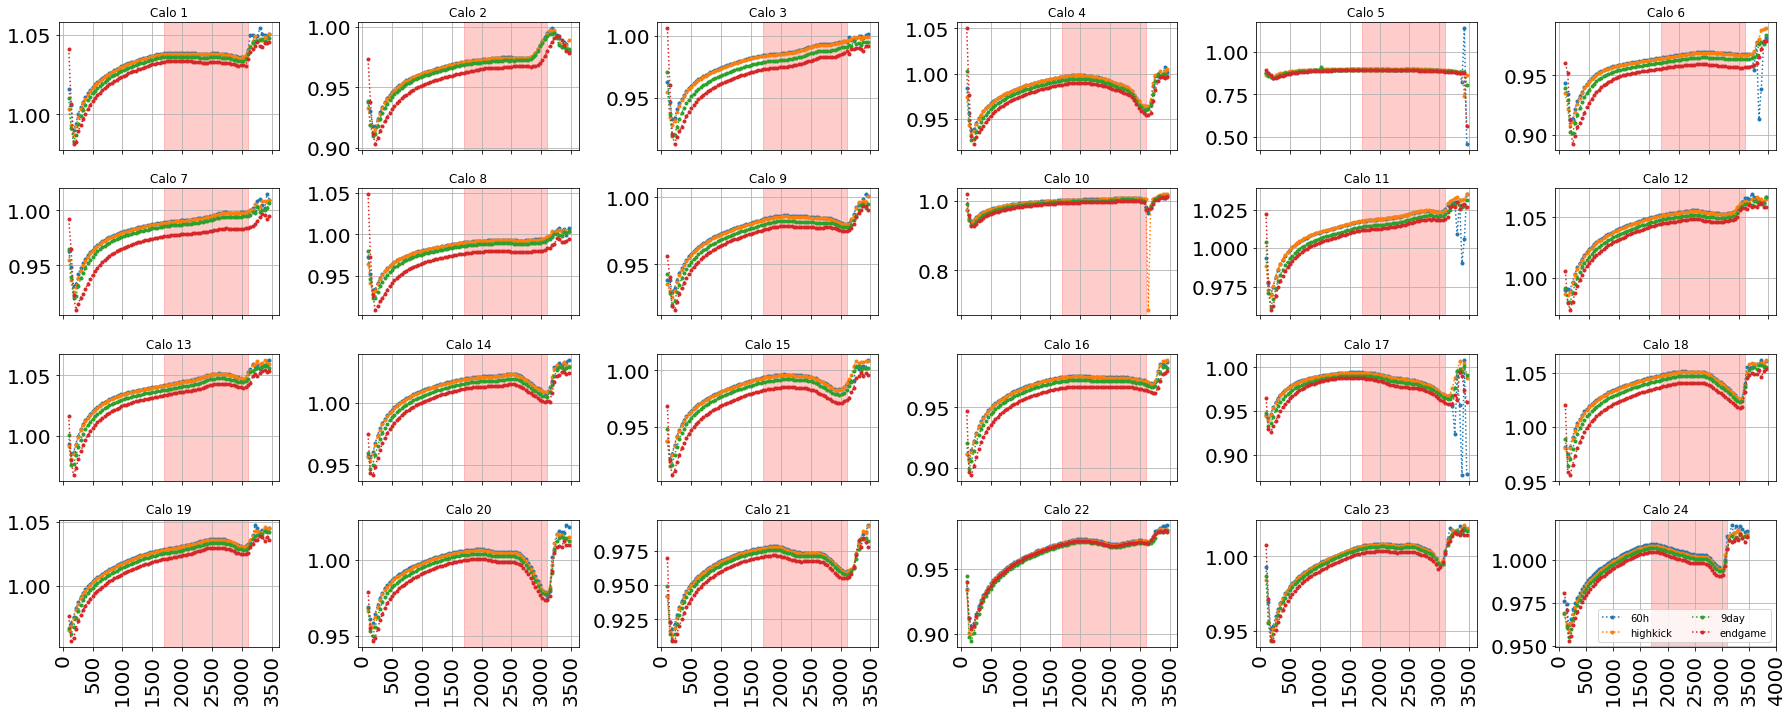

In [10]:
fix, ax = plt.subplots(4,6,figsize=(25,10),sharey=False,sharex=True)
for i, slopeVecEnergyBin in enumerate(slopesByEnergyByCalo):
    fmt=':.'
    axi = ax[int(np.floor(i/6))][i % 6]
    for j, datai in enumerate(slopeVecEnergyBin):
        xVec = xValsByEnergyByCalo[i][j]
        axi.plot(xVec,datai,fmt,label=datasets[j])
    
    axi.set_title("Calo "+str(i+1))
    #axi.set_xlabel(r"$E_{east}$ [MeV]")
    #axi.set_ylabel(r"Slope [$E_{west} / E_{east}$]")
    axi.grid()
    matplotlib.pyplot.sca(axi)

    plt.xticks(rotation=90)
    axi.set_xticks(np.arange(0, 4001, step=500))
    rect = matplotlib.patches.Rectangle((1700,0), 3100-1700, 10,color="red",alpha=0.2)

    axi.add_patch(rect)

    #axi.set_yticks(np.arange(0.8,1.1, step=0.1))
#plt.ylim(0.8,1.1)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

---

### Now lets focus on the set-subset differences

In [11]:
dataframes = []
for x in outpaths:
    df = pandas.read_csv(x+"onetoone/set_subset_dataframe.csv")
    dataframes.append(df)

In [12]:
df.head()

,Unnamed: 0,0,1,2,3,2norm,3norm,0norm,1norm,UniquePercentEast,UniquePercentWest
0,0,162312988.0,341413.0,4552323.0,58296567.0,7.808904,100.0,278.426323,0.585649,0.582239,7.243283
1,1,154976335.0,6828275.0,212228.0,54196899.0,0.391587,100.0,285.950558,12.599014,11.189276,0.390060
2,2,156249656.0,5249999.0,277389.0,52819107.0,0.525168,100.0,295.820329,9.939583,9.040950,0.522424
3,3,157316725.0,3838471.0,1126405.0,52971081.0,2.126453,100.0,296.986057,7.246352,6.756735,2.082176
4,4,144840349.0,14707100.0,1580681.0,46634242.0,3.389529,100.0,310.587977,31.537127,23.975837,3.278406


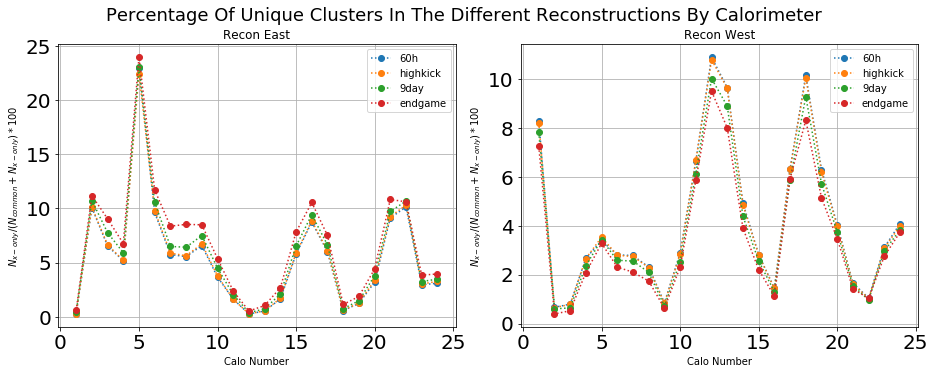

In [13]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
plt.suptitle("Percentage Of Unique Clusters In The Different Reconstructions By Calorimeter", size=18, y=1.03)
plt.xlabel("Calo Number")
plt.ylabel(r"$N_{x-only} / (N_{common} + N_{x-only}) * 100.$")

ax[0].set_title("Recon East")
ax[1].set_title("Recon West")

for i, df in enumerate(dataframes):
    ax[0].plot([x for x in range(1,25)],df['UniquePercentEast'], ':o', label=datasets[i])
    ax[1].plot([x for x in range(1,25)],df['UniquePercentWest'], ':o', label=datasets[i])

for axi in ax:
    axi.grid()
    axi.legend()
    axi.set_ylabel(r"$N_{x-only} / (N_{common} + N_{x-only}) * 100.$")
    axi.set_xlabel("Calo Number")
    
#plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

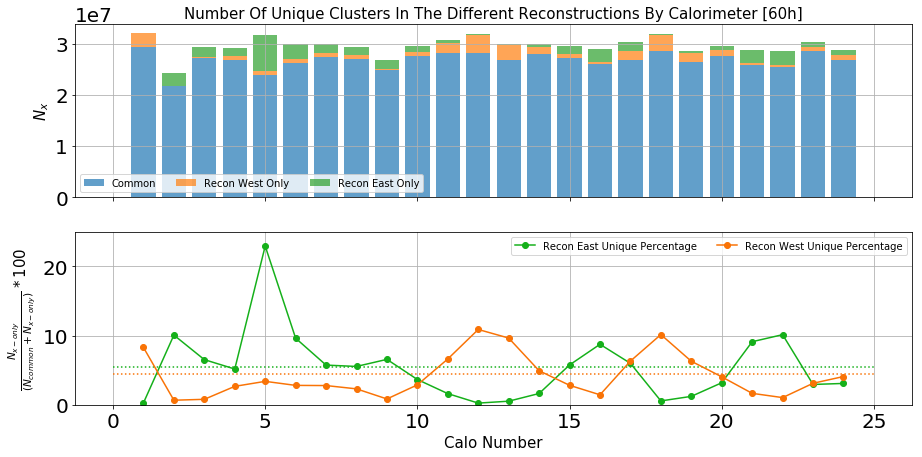

In [14]:
dataset = 0
df = dataframes[dataset]

fig, ax = plt.subplots(2,1,figsize=(15,7),sharex = True)
ax[0].set_title("Number Of Unique Clusters In The Different Reconstructions By Calorimeter ["+str(datasets[dataset])+"]", fontsize=15)
plt.xlabel("Calo Number", fontsize=15)
ax[0].set_ylabel(r"$N_{x}$", fontsize=15)


ax[0].bar([x for x in range(1,25)],df['3'], bottom = 0, label='Common', alpha=0.7)
ax[0].bar([x for x in range(1,25)],df['2'], bottom = df['3'], label='Recon West Only', alpha=0.7)
ax[0].bar([x for x in range(1,25)],df['1'], bottom = df['2']+df['3'], label='Recon East Only', alpha=0.7)

#ax[1] = ax1.twinx()
ax[1].set_ylabel(r"$\frac{ N_{x-only} }{ (N_{common} + N_{x-only})} * 100.$", fontsize=15)
ax[1].plot([x for x in range(0,26)],
           [df['1'].sum()/(df['1'].sum() + df['3'].sum())*100 for i in range(26)], 
           ':', color='xkcd:green')
ax[1].plot([x for x in range(0,26)],
           [df['2'].sum()/(df['2'].sum() + df['3'].sum())*100 for i in range(26)], 
           ':', color='xkcd:orange')

ax[1].plot([x for x in range(1,25)],df['UniquePercentEast'], '-o', color='xkcd:green', label='Recon East Unique Percentage')
ax[1].plot([x for x in range(1,25)],df['UniquePercentWest'], '-o', color='xkcd:orange', label='Recon West Unique Percentage')


#plt.yscale('log')
#ax[0].set_ylim(0,40000000)
ax[1].set_ylim(0,25)

ax[0].legend(ncol=3,loc = 3)
ax[1].legend(ncol=3,loc=1)

ax[0].grid()
ax[1].grid()
plt.show()

In [15]:
for i,df in enumerate(dataframes):
    print("For dataset:", datasets[i])
    print("   Percentage of 1:1 clusters in recon east which are unique:", round( df['1'].sum()/(df['1'].sum() + df['3'].sum())*100 , 4),"%")
    print("   Percentage of 1:1 clusters in recon west which are unique:", round( df['2'].sum()/(df['2'].sum() + df['3'].sum())*100 , 4),"%")

For dataset: 60h
   Percentage of 1:1 clusters in recon east which are unique: 5.5004 %
   Percentage of 1:1 clusters in recon west which are unique: 4.3844 %
For dataset: highkick
   Percentage of 1:1 clusters in recon east which are unique: 5.5551 %
   Percentage of 1:1 clusters in recon west which are unique: 4.3545 %
For dataset: 9day
   Percentage of 1:1 clusters in recon east which are unique: 6.0412 %
   Percentage of 1:1 clusters in recon west which are unique: 4.0464 %
For dataset: endgame
   Percentage of 1:1 clusters in recon east which are unique: 6.875 %
   Percentage of 1:1 clusters in recon west which are unique: 3.6894 %


In [16]:
datasetPPMstat = [1.338, 1.134, 0.913, 0.639]

In [17]:
def computeAllowedDifference( frac1, frac2, Aaverage, AaverageBetweenThresholds, ppmTotal):
    #print((frac1 + frac2)*(Aaverage**2)/(AaverageBetweenThresholds**2)*(ppmTotal**2))
    return np.sqrt((frac1 + frac2)*(AaverageBetweenThresholds**2)/(Aaverage**2)*(ppmTotal**2))

In [18]:
allowedDifferences = []
for i, df in enumerate(dataframes):
    total1 = df['1'].sum()/(df['1'].sum() + df['3'].sum())#*100
    total2 = df['2'].sum()/(df['2'].sum() + df['3'].sum())#*100
    print(#datasets[i], ',',
          #total1, ',',
          #total2, ',',
          #datasetPPMstat[i], ',',
          computeAllowedDifference(total1,
                                 total2,
                                 0.37,
                                 0.23,
                                 datasetPPMstat[i]))
    allowedDifferences.append(computeAllowedDifference(total1,
                                 total2,
                                 0.37,
                                 0.23,
                                 datasetPPMstat[i]))

0.2614971818110471
0.22190531409328396
0.18025646549514682
0.12910647005086182


In [19]:
with open("./data/result_summary.txt") as infile:
    lines = infile.readlines()

unblindingData = []
    
for line in lines:
    if("R:" not in line):
        continue
    i1 = (line.split(" ")[0])
    i2 = (line.split(" ")[3].split(",")[0])
    i3 = (float(line.split("R:")[1].split(",")[0]))
    i4 = (float(line.split("dR:")[1].split(",")[0]))
    unblindingData.append([i1,i2,i3,i4])

In [20]:
print(unblindingData)

[['60-Hour', '1a', -48.09, 1.34], ['60-Hour', '1b', -48.11, 1.21], ['60-Hour', '2a', -48.5, 1.33], ['60-Hour', '2b', -48.52, 1.22], ['60-Hour', '3a', -48.75, 1.36], ['60-Hour', '3b', -48.93, 1.36], ['60-Hour', '4a', -48.62, 1.33], ['60-Hour', '4b', -48.3, 1.21], ['60-Hour', '5a', -48.75, 1.33], ['60-Hour', '5b', -48.28, 1.19], ['60-Hour', '6a', -49.08, 2.06], ['HighKick', '1a', -47.09, 1.13], ['HighKick', '1b', -46.82, 1.02], ['HighKick', '2a', -46.88, 1.13], ['HighKick', '2b', -46.84, 1.03], ['HighKick', '3a', -46.87, 1.15], ['HighKick', '3b', -47.07, 1.15], ['HighKick', '4a', -46.89, 1.13], ['HighKick', '4b', -46.97, 1.02], ['HighKick', '5a', -46.96, 1.13], ['HighKick', '5b', -46.79, 1.01], ['HighKick', '6a', -44.82, 1.75], ['9-Day', '1a', -47.9, 0.91], ['9-Day', '1b', -47.43, 0.82], ['9-Day', '2a', -47.77, 0.91], ['9-Day', '2b', -47.45, 0.83], ['9-Day', '3a', -47.71, 0.93], ['9-Day', '3b', -47.78, 0.93], ['9-Day', '4a', -47.77, 0.91], ['9-Day', '4b', -47.62, 0.82], ['9-Day', '5a', -

In [21]:
df_unblinding = pandas.DataFrame(unblindingData, columns = ['dataset', 'analysis', 'R', 'dR'])  
df_unblinding.head()

,dataset,analysis,R,dR
0,60-Hour,1a,-48.09,1.34
1,60-Hour,1b,-48.11,1.21
2,60-Hour,2a,-48.50,1.33
3,60-Hour,2b,-48.52,1.22
4,60-Hour,3a,-48.75,1.36


In [22]:
analyses = [ '60-Hour', 'HighKick', '9-Day', 'EndGame']

In [23]:
#[CU(T,A), 2-UW(T,A), 3-BU(T,R), 4-SJTU(T,A), 5-EU(T,A), 6-UKy(Q)]
legend = ["CU (T)", "CU (A)", "UW (T)", "UW (A)", "BU (T)", "BU (R)", "SJTU (T)", "SJTU (A)", "EU (T)", "EU (A)", "UKy (Q)"]

-48.09
-47.09
-47.9
-47.21


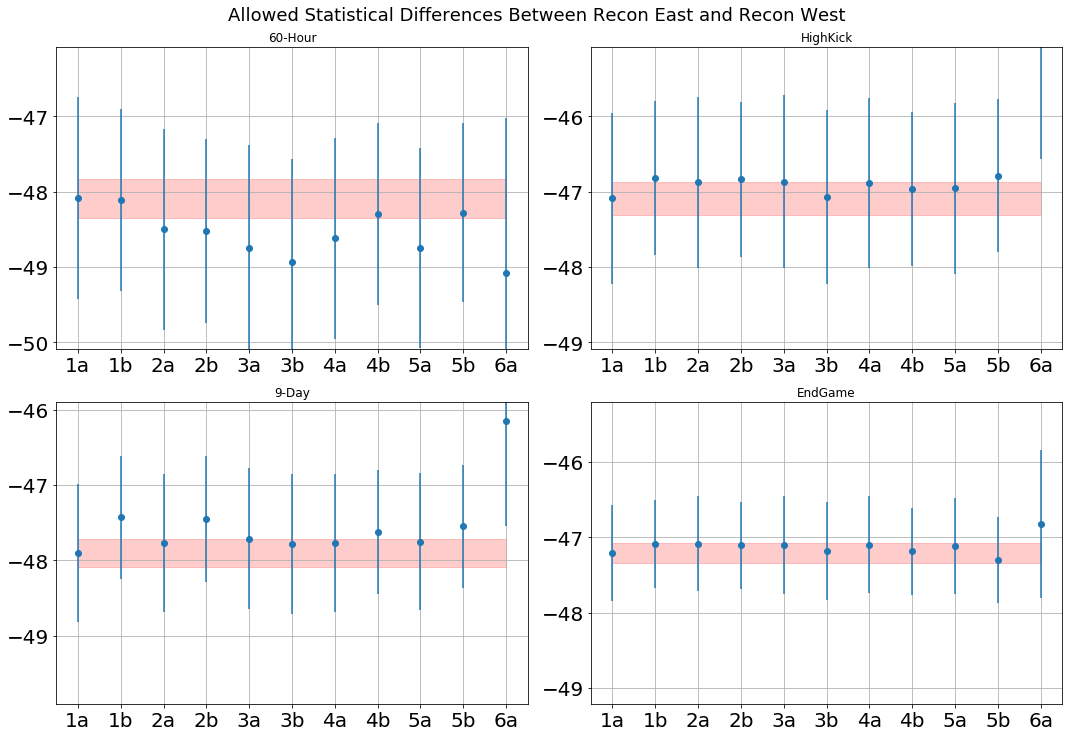

In [24]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
ax = flatten2dArray(axs)
for i, a in enumerate(analyses):
    dfi = df_unblinding.loc[df_unblinding['dataset'] == a]
    ax[i].errorbar(dfi['analysis'], dfi['R'], yerr=dfi['dR'], fmt="o")
    ax[i].grid()
    
    reconEast = float(dfi.loc[dfi['analysis'] == '1a']['R'])
    print(reconEast)
    
    lowerBound = reconEast - allowedDifferences[i]
    
    rect = matplotlib.patches.Rectangle((0,lowerBound), 10, 2*allowedDifferences[i],color="red",alpha=0.2)
    ax[i].add_patch(rect)
    ax[i].set_title(analyses[i])
    
    plt.suptitle("Allowed Statistical Differences Between Recon East and Recon West", y=1.02, fontsize=18)
    ax[i].set_ylim(reconEast - 2, reconEast + 2)
    #ax[i].set_xticklabels(legend, rotation=90)
    
plt.tight_layout()
plt.show()

---

### Compute the allowed statistical difference of the weighted average

In [25]:
#from aarons fit parameters
nMuonsInFit = [3528793,
              4883177,
              7447774,
              15033437]

In [26]:
uniqueEast = []
uniqueWest = []
for i,df in enumerate(dataframes):
    uniqueEast.append( round( df['1'].sum()/(df['1'].sum() + df['3'].sum()) , 40) )
    uniqueWest.append( round( df['2'].sum()/(df['2'].sum() + df['3'].sum()) , 40) )

In [27]:
weightedWest = np.sum( [(x*y)/np.sum(nMuonsInFit) for (x,y) in zip(nMuonsInFit, uniqueWest)] )
print(weightedWest)

weightedEast = np.sum( [(x*y)/np.sum(nMuonsInFit) for (x,y) in zip(nMuonsInFit, uniqueEast)] )
print(weightedEast)

datasetPPMtotal = float(df_unblinding.loc[df_unblinding['dataset'] == "Run-1"].loc[df_unblinding['analysis'] == "1a"]['dR'])
print(datasetPPMtotal)

allowedDifferenceSum = computeAllowedDifference(weightedWest,
                                 weightedEast,
                                 0.37,
                                 0.23,
                                 datasetPPMtotal)

print(allowedDifferenceSum)

0.03959965325073449
0.06308332839328164
0.448
0.08923872597808644


-47.456


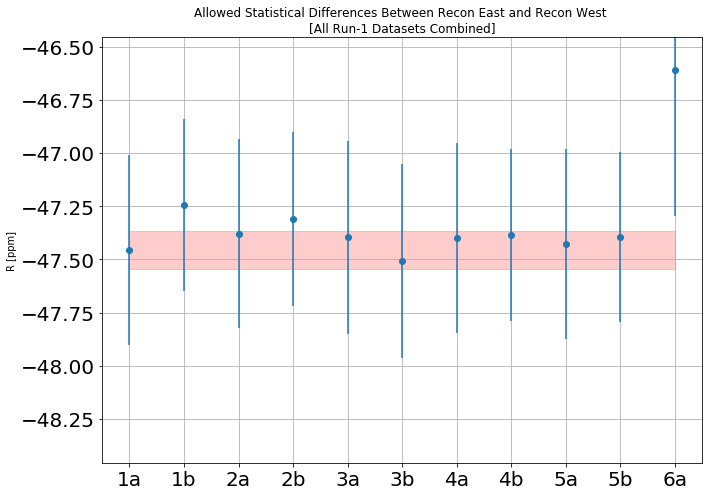

In [28]:
fig,ax = plt.subplots(figsize=(10,7))

dfi = df_unblinding.loc[df_unblinding['dataset'] == 'Run-1']

ax.errorbar(dfi['analysis'], dfi['R'], yerr=dfi['dR'], fmt="o")
ax.grid()

reconEast = float(dfi.loc[dfi['analysis'] == '1a']['R'])
print(reconEast)

lowerBound = reconEast - allowedDifferenceSum

rect = matplotlib.patches.Rectangle((0,lowerBound), 10, 2*allowedDifferenceSum,color="red",alpha=0.2)
ax.add_patch(rect)
ax.set_title(analyses[i])

plt.title("Allowed Statistical Differences Between Recon East and Recon West \n[All Run-1 Datasets Combined]")
plt.ylabel("R [ppm]")
ax.set_ylim(reconEast - 1, reconEast + 1)
#ax[i].set_xticklabels(legend, rotation=90)
    
plt.tight_layout()
plt.show()

---

### And now for the A-weighted method

In [48]:
dataframesAweighted = []
for x in outpaths:
    df = pandas.read_csv(x+"onetoone/set_subset_dataframe_Aweighted.csv")
    dataframesAweighted.append(df)

In [55]:
allowedDifferencesAweighted = []
for i, df in enumerate(dataframesAweighted):
    total1 = df['1'].sum()/(df['1'].sum() + df['3'].sum())#*100
    total2 = df['2'].sum()/(df['2'].sum() + df['3'].sum())#*100
    print(#datasets[i], ',',
          #total1, ',',
          #total2, ',',
          #datasetPPMstat[i], ',',
          round( computeAllowedDifference(total1,
                                 total2,
                                 0.37,
                                 0.23,
                                 datasetPPMstat[i]), 4))
    allowedDifferencesAweighted.append(computeAllowedDifference(total1,
                                 total2,
                                 0.37,
                                 0.23,
                                 datasetPPMstat[i]))

0.1366
0.1134
0.0897
0.0599


-48.11
-46.82
-47.43
-47.09


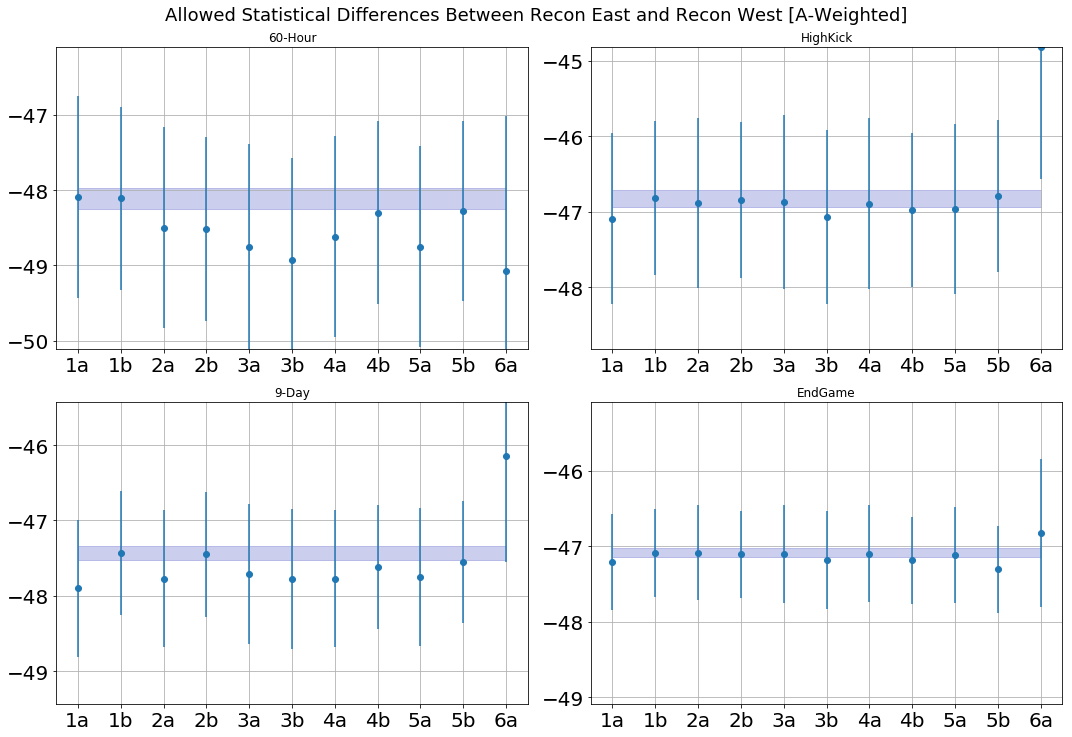

In [50]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
ax = flatten2dArray(axs)
for i, a in enumerate(analyses):
    dfi = df_unblinding.loc[df_unblinding['dataset'] == a]
    ax[i].errorbar(dfi['analysis'], dfi['R'], yerr=dfi['dR'], fmt="o")
    ax[i].grid()
    
    reconEast = float(dfi.loc[dfi['analysis'] == '1b']['R'])
    #print(reconEast)
    
    lowerBound = reconEast - allowedDifferencesAweighted[i]
    
    rect = matplotlib.patches.Rectangle((0,lowerBound), 10, 2*allowedDifferencesAweighted[i],color="xkcd:cobalt blue",alpha=0.2)
    ax[i].add_patch(rect)
    ax[i].set_title(analyses[i])
    
    plt.suptitle("Allowed Statistical Differences Between Recon East and Recon West [A-Weighted]", y=1.02, fontsize=18)
    ax[i].set_ylim(reconEast - 2, reconEast + 2)
    #ax[i].set_xticklabels(legend, rotation=90)
    
plt.tight_layout()
plt.show()

In [58]:
uniqueEastAweighted = []
uniqueWestAweighted = []
for i,df in enumerate(dataframesAweighted):
    uniqueEastAweighted.append( round( df['1'].sum()/(df['1'].sum() + df['3'].sum()) , 40) )
    uniqueWestAweighted.append( round( df['2'].sum()/(df['2'].sum() + df['3'].sum()) , 40) )

In [59]:
weightedWestAweighted = np.sum( [(x*y)/np.sum(nMuonsInFit) for (x,y) in zip(nMuonsInFit, uniqueWestAweighted)] )
print(weightedWestAweighted)

weightedEastAweighted = np.sum( [(x*y)/np.sum(nMuonsInFit) for (x,y) in zip(nMuonsInFit, uniqueEastAweighted)] )
print(weightedEastAweighted)

datasetPPMtotalAweighted = float(df_unblinding.loc[df_unblinding['dataset'] == "Run-1"].loc[df_unblinding['analysis'] == "1b"]['dR'])
print(datasetPPMtotalAweighted)

allowedDifferenceSumAweighted = computeAllowedDifference(weightedWestAweighted,
                                 weightedEastAweighted,
                                 0.37,
                                 0.12,
                                 datasetPPMtotalAweighted)

print(allowedDifferenceSumAweighted*1000,"ppb")

0.022521687870274885
0.001753991953826786
0.404
20.41486853376625 ppb


-47.243


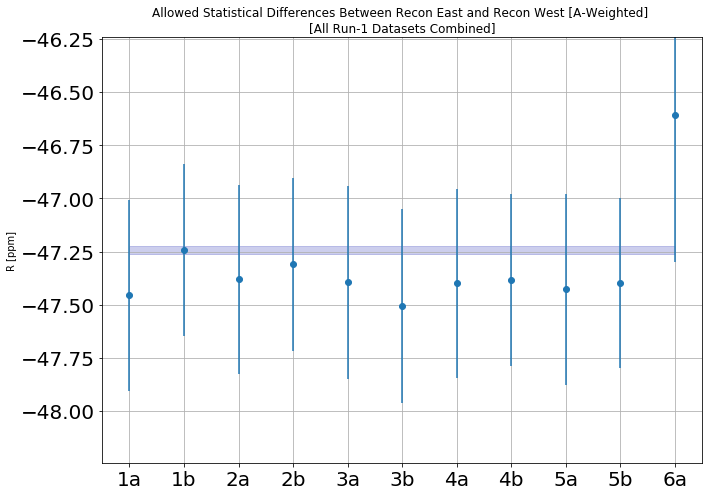

In [60]:
fig,ax = plt.subplots(figsize=(10,7))

dfi = df_unblinding.loc[df_unblinding['dataset'] == 'Run-1']

ax.errorbar(dfi['analysis'], dfi['R'], yerr=dfi['dR'], fmt="o")
ax.grid()

reconEast = float(dfi.loc[dfi['analysis'] == '1b']['R'])
print(reconEast)

lowerBound = reconEast - allowedDifferenceSumAweighted

rect = matplotlib.patches.Rectangle((0,lowerBound), 10, 2*allowedDifferenceSumAweighted,color="xkcd:cobalt blue",alpha=0.2)
ax.add_patch(rect)
ax.set_title(analyses[i])

plt.title("Allowed Statistical Differences Between Recon East and Recon West [A-Weighted] \n[All Run-1 Datasets Combined]")
plt.ylabel("R [ppm]")
ax.set_ylim(reconEast - 1, reconEast + 1)
#ax[i].set_xticklabels(legend, rotation=90)
    
plt.tight_layout()
plt.show()

---

### Delta T values

In [35]:
deltatByCalo = []
deltatErrByCalo = []
for x in outpaths:
    with open(x+"onetoone/deltaT_by_calo.txt") as file:
        line = file.readlines()
        #print(line[0])
        ding = stringToListOfFloats(line[0][:-1])
        deltatByCalo.append(ding)
        ding = stringToListOfFloats(line[1])
        deltatErrByCalo.append(ding)


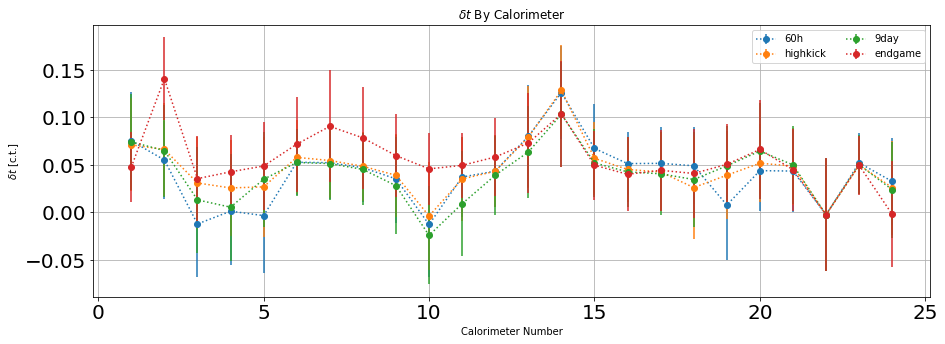

In [36]:
fig ,ax = plt.subplots(figsize=(15,5))
for i, x in enumerate(deltatByCalo):
    plt.errorbar([i for i in range(1,25)], x, yerr=deltatErrByCalo[i], fmt="o:", label=datasets[i])
plt.title(r"$\delta t$ By Calorimeter")
plt.ylabel(r"$\delta t$ [c.t.]")
plt.xlabel("Calorimeter Number")
plt.grid()    
plt.legend(ncol=2)
plt.show()